# Analyse de correspondances multiples
Les données poison du package FactoMineR représentent une enquête menée auprès d’enfants d'une école primaire qui ont subi des intoxications alimentaires. Les données contiennent 55 lignes (individus) et 15 colonnes (variables).
Nous allons executer l'ACM sur les 11 dernières variables.

In [7]:
#install.packages('FactoInvestigate')

In [6]:
library(FactoMineR)
library(factoextra)
library(FactoInvestigate)

In [8]:
data(poison)
dim(poison)

[1] 55 15

In [15]:
head(poison)

,Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
2,5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
3,6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
4,9,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_n,Courg_y,Cheese_y,Icecream_y
5,7,14,Sick_y,M,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
6,72,9,Sick_y,M,Nausea_n,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_n,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [9]:
summary(poison)

      Age             Time           Sick    Sex         Nausea      Vomiting 
 Min.   : 4.00   Min.   : 0.00   Sick_n:17   F:28   Nausea_n:43   Vomit_n:33  
 1st Qu.: 6.00   1st Qu.: 0.00   Sick_y:38   M:27   Nausea_y:12   Vomit_y:22  
 Median : 8.00   Median :12.00                                                
 Mean   :16.93   Mean   :10.16                                                
 3rd Qu.:10.00   3rd Qu.:16.50                                                
 Max.   :88.00   Max.   :22.00                                                
  Abdominals     Fever          Diarrhae       Potato       Fish        Mayo   
 Abdo_n:18   Fever_n:20   Diarrhea_n:20   Potato_n: 3   Fish_n: 1   Mayo_n:10  
 Abdo_y:37   Fever_y:35   Diarrhea_y:35   Potato_y:52   Fish_y:54   Mayo_y:45  
                                                                               
                                                                               
                                               

In [13]:
poison.active=poison[,5:15]
res.mca = MCA (poison.active, graph = FALSE)

In [14]:
summary(res.mca)


Call:
MCA(X = poison.active, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.335   0.129   0.107   0.096   0.079   0.071   0.060
% of var.             33.523  12.914  10.735   9.588   7.883   7.109   6.017
Cumulative % of var.  33.523  46.437  57.172  66.760  74.643  81.752  87.769
                       Dim.8   Dim.9  Dim.10  Dim.11
Variance               0.056   0.041   0.013   0.012
% of var.              5.577   4.121   1.304   1.229
Cumulative % of var.  93.346  97.467  98.771 100.000

Individuals (the 10 first)
              Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr   cos2
1          | -0.453  1.111  0.347 | -0.264  0.982  0.118 |  0.172  0.498  0.050
2          |  0.836  3.792  0.556 | -0.032  0.014  0.001 | -0.072  0.088  0.004
3          | -0.448  1.089  0.548 |  0.135  0.258  0.050 | -0.225  0.856  0.138
4          |  0.880  4.204  0.748 | -0.085  0.103  0.007 | -0.021  0.007

In [22]:
eig.val=res.mca$eig
round(res.mca$eig,3)


,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.335,33.523,33.523
dim 2,0.129,12.914,46.437
dim 3,0.107,10.735,57.172
dim 4,0.096,9.588,66.760
dim 5,0.079,7.883,74.643
dim 6,0.071,7.109,81.752
dim 7,0.060,6.017,87.769
dim 8,0.056,5.577,93.346
dim 9,0.041,4.121,97.467
dim 10,0.013,1.304,98.771


Un premier critère pour le choix du nombre d'axe serait de garder les axes ayant une valeur propre supérieur à la moyenne cad supérieur à 1/11=0.09 ce qui reviendrait à garder les 4 premiers axes.
Un deuxième critère serait de voir le taux d'inertie cumulé, le premier plan cumule une inertie de 46.437 on peut donc garder les 2 premiers axes.

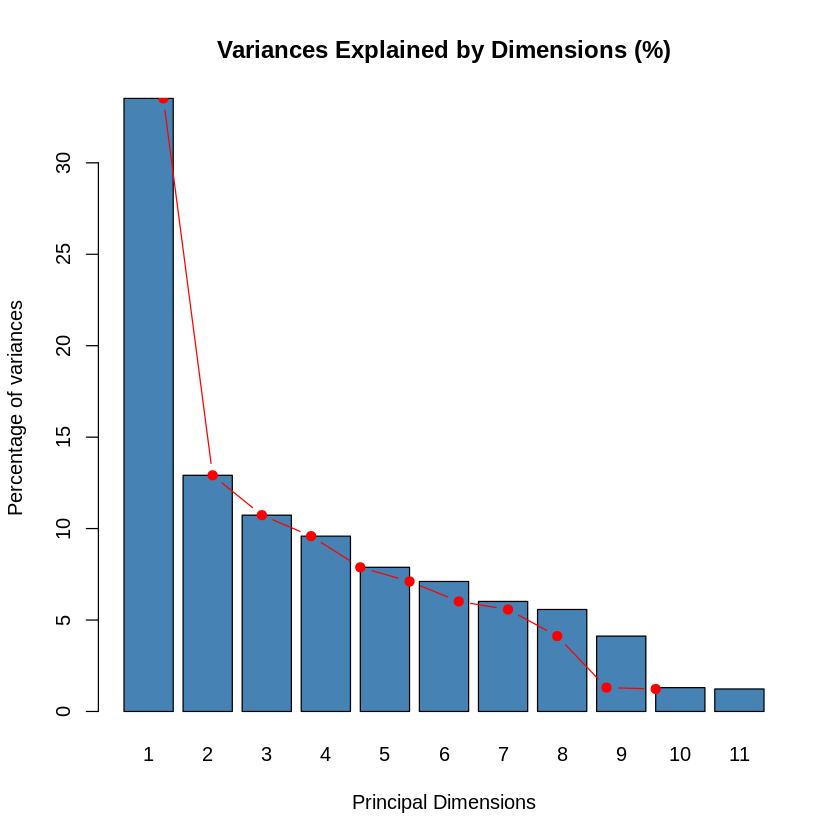

In [24]:
barplot(eig.val[, 2], 
        names.arg = 1:nrow(eig.val), 
        main = "Variances Explained by Dimensions (%)",
        xlab = "Principal Dimensions",
        ylab = "Percentage of variances",
        col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.val), eig.val[, 2], 
      type = "b", pch = 19, col = "red")



Le critère du coude suggère de garder les 2 premiers axes.

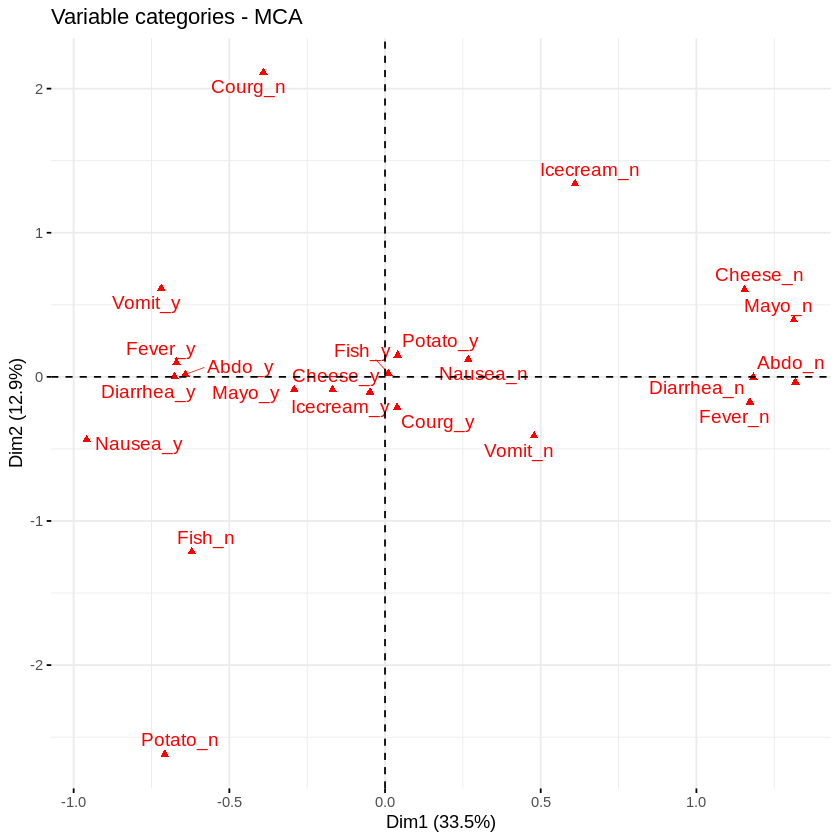

In [26]:
fviz_mca_var (res.mca,
              repel = TRUE, 
              ggtheme = theme_minimal ())

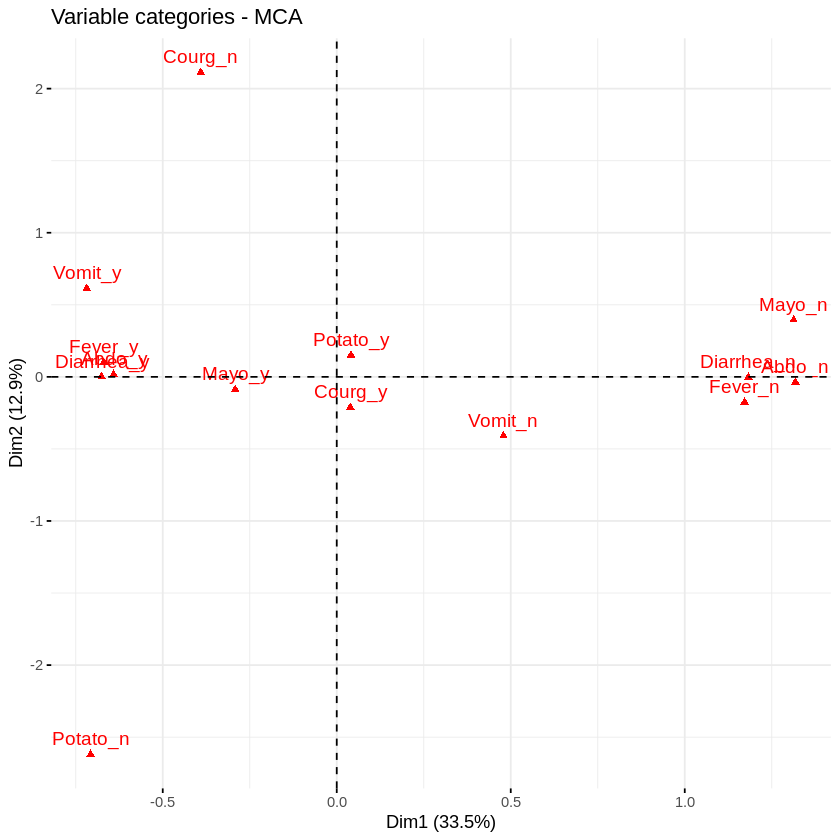

In [28]:
#visualiser les modalités avec un cos2 supérieur à 0.4
fviz_mca_var(res.mca, select.var = list(cos2 = 0.4))

On remarque :
- Un premier groupe de modalités à droite constitué de : Diarrhea_n,Fever_n,Abdo_n,Mayo_n,Cheese_n qui indique un lien entre ne pas consommer de la mayonnaise ou du fromage et ne pas avoir de fièvre, de diarrhée ou de douleurs abdominales. Ce groupe s'oppose sur le premier axe au groupe Cheese_y, Mayo_y, Diarrhea_y, Abdo_y, Fever_n ainsi que vomit_y et nausea_y
- Le deuxième axe oppose Courg_n à potato_n

Nous allons utiliser dimdesc pour nous aider à interpreter la carte

In [30]:
#dimdesc(res.mca,axes=1:2,proba=0.05)

Nous allons maintenant interpréter la carte des individus

Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

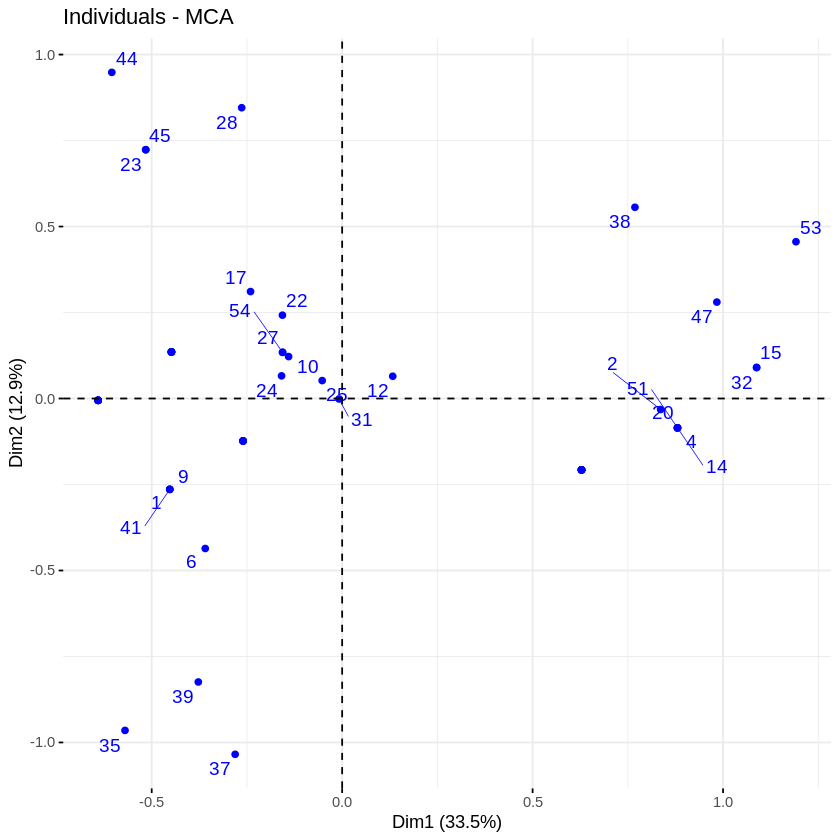

In [31]:
fviz_mca_ind (res.mca,
              repel = TRUE, 
              ggtheme = theme_minimal ())

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

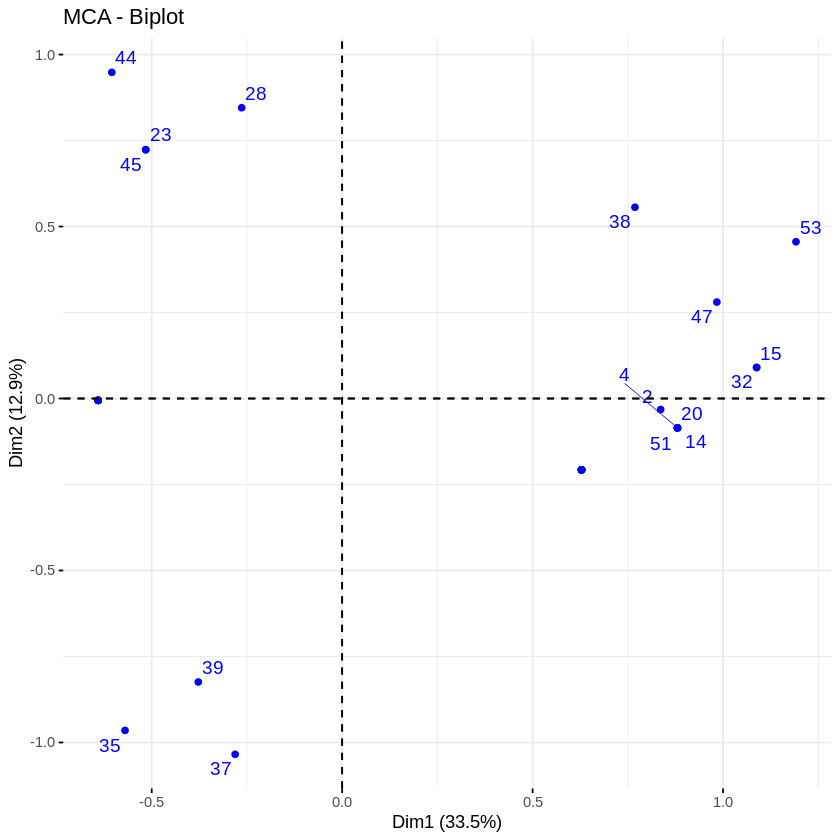

In [32]:
# Top 30 des individus les plus contributifs
fviz_mca_biplot(res.mca,
               select.ind = list(contrib = 30),
               invisible ="var",repel = TRUE, 
              ggtheme = theme_minimal ())

Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

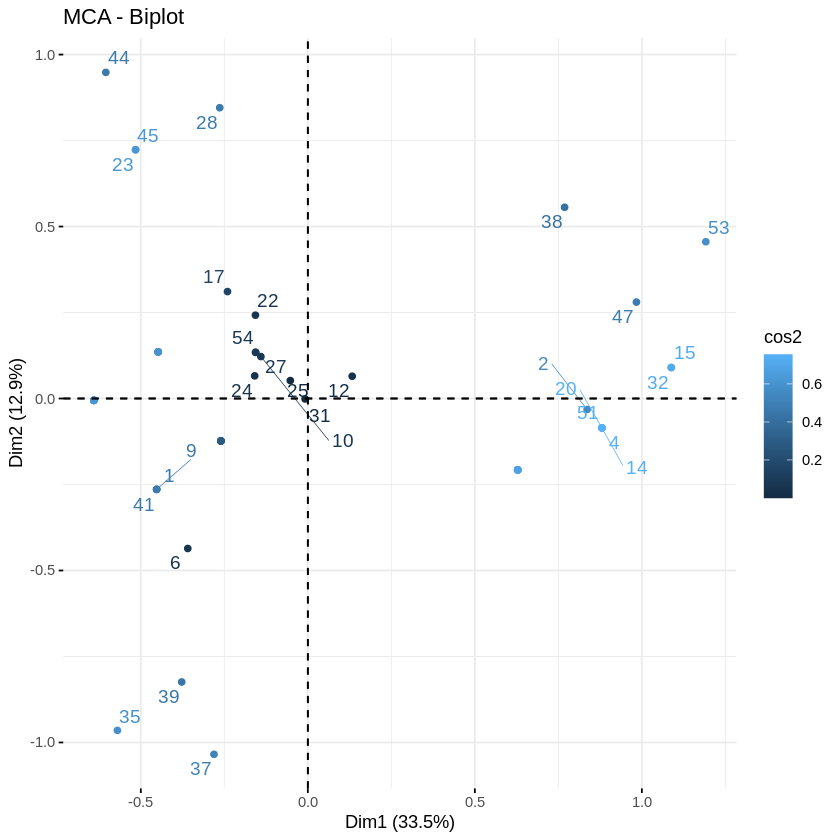

In [33]:
fviz_mca_biplot(res.mca,
               col.ind="cos2",
               invisible ="var",repel = TRUE, 
              ggtheme = theme_minimal ())

On remarque:
- un premier groupe d’enfants situé du coté droit de la carte, serait caractérisé par les modalités Cheese_n, Mayo_n, Diarrhea_n, Abdo_n et Fever_n et qui sont donc les enfants sains.
- un deuxième et un troisième groupe d'enfants opposé au premier caractérisés par Cheese_y, Mayo_y, Diarrhea_y, Abdo_y, Fever_n, Vomit_y et Nausea_y 
- Le deuxième et le troisième groupe s'oppose sur le deuxième axe principalement par la consommation de courgette et de pomme de terre.

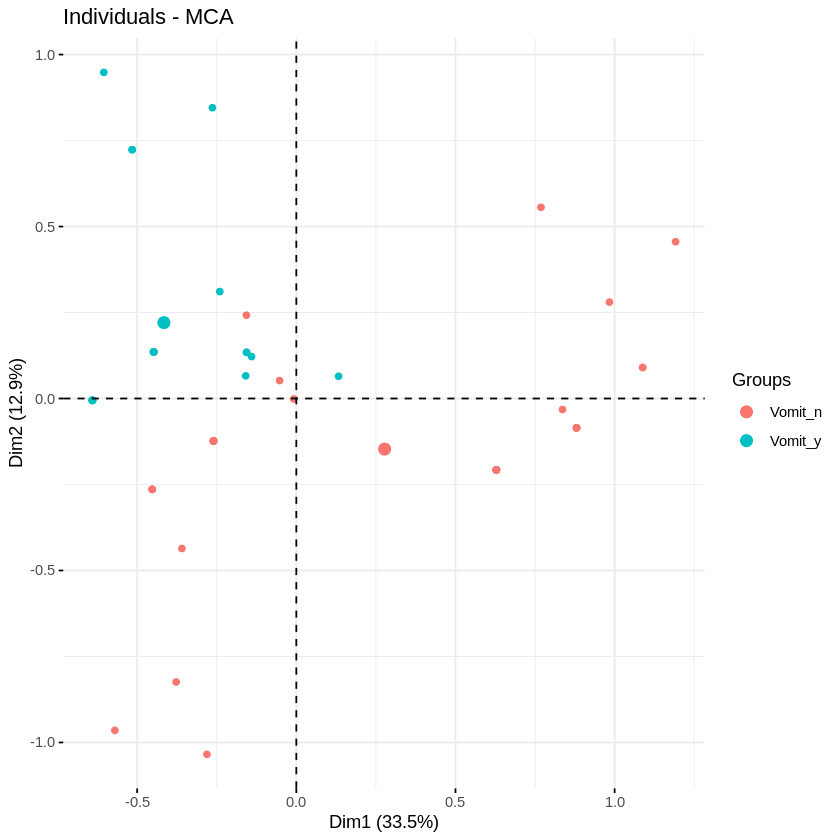

In [34]:
# Colorer les individus par groupes
grp <- as.factor(poison.active[, "Vomiting"])
fviz_mca_ind(res.mca, label="none", habillage=grp)

Le centre du groupe d’enfants qui n’ont pas vomi (i.e. la grande boule rouge) est à droite de l’axe 1 tandis que celui des enfants qui ont vomi est à gauche (i.e. la grande boule bleue).

# Représentation simultanée

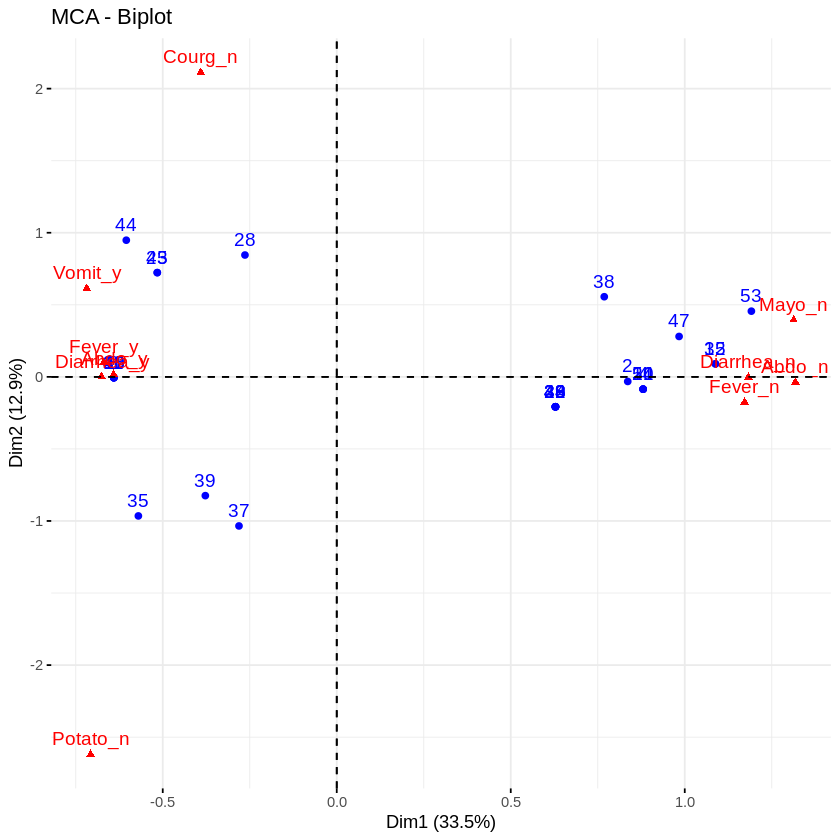

In [38]:
fviz_mca_biplot(res.mca,
               select.ind = list(contrib = 30),
               select.var = list(contrib = 10))

In [39]:
#res.mca.sup = MCA (poison, quanti.sup=c(1:2), quali.sup=c(3:4))